In [ ]:
import pandas as pd
df = pd.read_json('seoulfashion_rawdata.json')
df.head()

In [ ]:
base_df = df[['id', 'username', 'hashtags']]

In [ ]:
base_df.head()

In [ ]:
base_df.info()

In [ ]:
base_df[['id', 'username']].describe()

In [ ]:
groupby_df = base_df.groupby('username').agg({'hashtags': 'sum'})

In [ ]:
print(base_df.info())
base_df.head()

In [ ]:
print(groupby_df.info())
groupby_df.head(10)

In [ ]:
remove_test = groupby_df[groupby_df.astype(str)['hashtags'] != '[]']

In [ ]:
print(remove_test.info())
remove_test.head(10)

In [ ]:
remove_test = remove_test[1:]

In [ ]:
remove_test.head(3)

In [ ]:
tag_dict = {}

In [ ]:
tag_dict['test'] = 1

In [ ]:
tag_dict

In [ ]:
tag_dict['test2'] = 2

In [ ]:
tag_dict

In [ ]:
tag_dict['test'] = tag_dict['test'] + 1

In [ ]:
tag_dict

In [ ]:
tag_dict.clear()
tag_dict

In [ ]:
test_dict1 = {}

In [ ]:
check = test_dict1.get('a')
if check == None:
    print('a is not here')

In [ ]:
if word in hash_map:
                hash_map[word] = hash_map[word] + 1
            else:
                hash_map[word] = 1

In [ ]:
test_dict = {}
test_list = [['A', 'B', 'C'], ['A', 'B'], ['A']]
for one_list in test_list:
    for word in one_list:
        if word in test_dict:
            test_dict[word] = test_dict[word] + 1
        else:
            test_dict[word] = 1
print(test_dict)

In [ ]:
tag_dict = {}
for index, row in remove_test.iterrows():
    for tag in row['hashtags']:
        if tag in tag_dict:
            tag_dict[tag] = tag_dict[tag] + 1
        else:
            tag_dict[tag] = 1

In [ ]:
dict(list(tag_dict.items())[:10])

In [ ]:
sort_dict = sorted(tag_dict.items(), key=lambda kv: kv[1])

In [ ]:
sort_dict[-30:]

In [ ]:
type(sort_dict)
## this is list of tuple

In [ ]:
## list of tuple -> pandas dataframe
top100 = pd.DataFrame(sort_dict[-100:], columns=['Tag', 'Freq'])
top100.head()

In [ ]:
top100.sort_values(by = 'Freq', ascending = False)

In [ ]:
df_nodes = top100.sort_values(by = 'Freq', ascending = False)

In [ ]:
!pip install networkx

In [ ]:
!pip install matplotlib

In [ ]:
df_nodes.head()

In [ ]:
## Group num with Random integer
import numpy as np
df_nodes['Group'] = np.random.randint(1, 14, df_nodes.shape[0])

In [ ]:
df_nodes.head()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

G = nx.Graph(day="Stackoverflow")

for index, row in df_nodes.iterrows():
    G.add_node(row['Tag'], group=row['Group'], nodesize=row['Freq'])
    
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

plt.figure(figsize=(25,25))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize']*10 for node in G]

"""
Using the spring layout : 
- k controls the distance between the nodes and varies between 0 and 1
- iterations is the number of times simulated annealing is run
default k=0.1 and iterations=50
"""
nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()

In [1]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
import numpy as np

data = np.random.randint(-100, 100, 50).cumsum()
data

array([ 92, 127,  92,  57,  17,  36, 108, 173, 268, 226, 301, 323, 375,
       305, 379, 475, 557, 642, 657, 571, 564, 503, 419, 491, 499, 430,
       345, 429, 389, 424, 415, 395, 453, 465, 376, 378, 440, 477, 518,
       604, 595, 508, 607, 533, 618, 668, 756, 661, 646, 612])

Text(0.5, 0, '시간(분)')

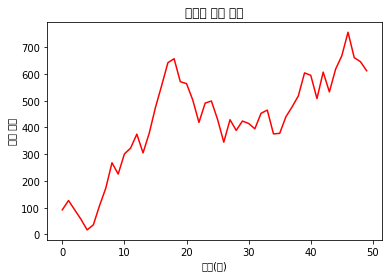

In [3]:
plt.plot(range(50), data, 'r')
mpl.rcParams['axes.unicode_minus'] = False
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')

In [4]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정 파일 위치: ', mpl.matplotlib_fname())

버전:  3.0.2
설치 위치:  /opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py
설정 위치:  /home/jovyan/.config/matplotlib
캐시 위치:  /home/jovyan/.cache/matplotlib
설정 파일 위치:  /opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc


In [5]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))
# 10개의 폰트 명 만 출력
f

24
24


['STIXSizeFourSym',
 'DejaVu Sans',
 'STIXGeneral',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'cmsy10',
 'STIXSizeThreeSym',
 'cmss10',
 'STIXNonUnicode',
 'cmtt10',
 'STIXGeneral',
 'DejaVu Serif Display',
 'cmr10',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'DejaVu Serif',
 'DejaVu Serif',
 'cmb10',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'STIXSizeFiveSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'cmmi10',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'DejaVu Sans Display',
 'cmex10',
 'DejaVu Serif',
 'Liberation Sans',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Liberation Mono',
 'Liberation Mono',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Liberation Mono',
 'Liberati

In [6]:
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (14,4)

Text(0.5, 0, '시간(분)')

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


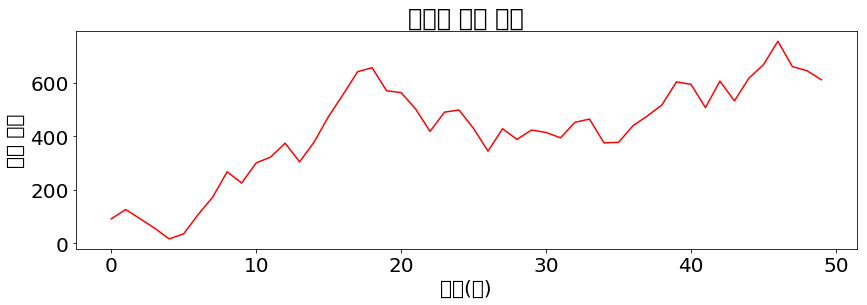

In [7]:
plt.plot(range(50), data, 'r')
mpl.rcParams['axes.unicode_minus'] = False
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')